In [1]:
import numpy as np

from src.Lab import Lab

# Settings
height = 90
width = 160
init_pop_count = 100

# Init lab
lab = Lab(height=height, width=width, init_population_count=init_pop_count)

Agent 0 initialized by Universe
Agent 1 initialized by Universe
Agent 2 initialized by Universe
Agent 3 initialized by Universe
Agent 4 initialized by Universe
Agent 5 initialized by Universe
Agent 6 initialized by Universe
Agent 7 initialized by Universe
Agent 8 initialized by Universe
Agent 9 initialized by Universe
Agent 10 initialized by Universe
Agent 11 initialized by Universe
Agent 12 initialized by Universe
Agent 13 initialized by Universe
Agent 14 initialized by Universe
Agent 15 initialized by Universe
Agent 16 initialized by Universe
Agent 17 initialized by Universe
Agent 18 initialized by Universe
Agent 19 initialized by Universe
Agent 20 initialized by Universe
Agent 21 initialized by Universe
Agent 22 initialized by Universe
Agent 23 initialized by Universe
Agent 24 initialized by Universe
Agent 25 initialized by Universe
Agent 26 initialized by Universe
Agent 27 initialized by Universe
Agent 28 initialized by Universe
Agent 29 initialized by Universe
Agent 30 initialized

In [2]:
lab.experiment(max_duration=4)

Agent 0 start running
Agent 1 start running
Agent 2 start running
Agent 3 start running
Agent 4 start running
Agent 5 start running
Agent 6 start running
Agent 7 start running
Agent 8 start running
Agent 9 start running
Agent 10 start running
Agent 11 start running
Agent 12 start running
Agent 13 start running
Agent 14 start running
Agent 15 start running
Agent 16 start running
Agent 17 start running
Agent 18 start running
Agent 19 start running
Agent 20 start running
Agent 21 start running
Agent 22 start running
Agent 23 start running
Agent 24 start running
Agent 25 start running
Agent 26 start running
Agent 27 start running
Agent 28 start running
Agent 29 start running
Agent 30 start running
Agent 31 start running
Agent 32 start running
Agent 33 start running
Agent 34 start running
Agent 35 start running
Agent 36 start running
Agent 37 start running
Agent 38 start running
Agent 39 start running
Agent 40 start running
Agent 41 start running
Agent 42 start running
Agent 43 start runnin

Total agents: 370
Agents mean path len = 54 px
Agents median path len = 11 px


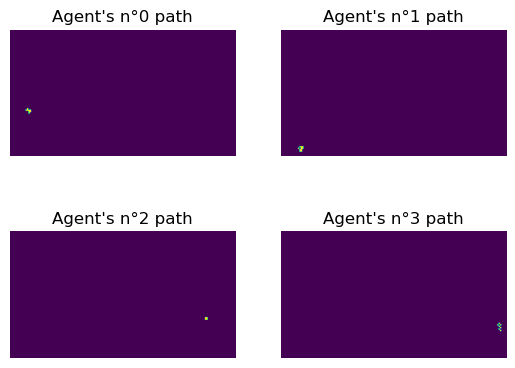

In [3]:
lab.analyze(n_viz=4)

In [4]:
import imageio
timeline = lab.generate_actions_timeline(time_step=1e6)
images = []
from matplotlib import pyplot as plt

for t in timeline:
    images.append(t)

JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP
JUMP


In [5]:
imageio.mimsave('results/output.gif', images, duration=0.01, loop=0)

In [11]:
from src.Agent import Agent
for k, a in Agent.population.items():
    if a.death_date is None:
        print(a, a.phenome.brain.weights)

ID:  51 | GEN:   0 | BIRTH:     30 ms | DEATH:      0 ms | POS: P(y=32, x=143, t=4087640234) [0.8780861382129368, 0.12085394635079864, 0.0010599154362646212]
ID: 195 | GEN:   1 | BIRTH:     93 ms | DEATH:      0 ms | POS: P(y=21, x=114, t=4050385921) [0.8780861382129368, 0.12085394635079864, 0.0010599154362646212]
ID: 200 | GEN:   2 | BIRTH:    255 ms | DEATH:      0 ms | POS: P(y=4, x=129, t=4113257974) [0.8780861382129368, 0.12085394635079864, 0.0010599154362646212]
ID: 201 | GEN:   2 | BIRTH:    262 ms | DEATH:      0 ms | POS: P(y=19, x=130, t=4050696508) [0.8780861382129368, 0.12085394635079864, 0.0010599154362646212]
ID: 202 | GEN:   2 | BIRTH:    265 ms | DEATH:      0 ms | POS: P(y=22, x=131, t=4092849604) [0.8780861382129368, 0.12085394635079864, 0.0010599154362646212]
ID: 203 | GEN:   3 | BIRTH:    285 ms | DEATH:      0 ms | POS: P(y=49, x=127, t=3945507579) [0.8780861382129368, 0.12085394635079864, 0.0010599154362646212]
ID: 204 | GEN:   1 | BIRTH:    316 ms | DEATH:      0